---
# Esercitazione 2
---
## Esercizio 2.1 - Integrazione con il metodo Monte Carlo
In questa esercitazione si vuole stimare il valore del seguente integrale: $I = \int_0^1 \dfrac{\pi}{2}\cos(\pi x/2) dx = 1$ tramite il metodo Monte Carlo

Questa integrazione viene svolta tramite due metodi di calcolo, nel primo si estraggono numeri pseudocasuali da distribuzione uniforme e nel secondo da distribuzione non uniforme. $\\$

### Punto 1 - Primo metodo
Nel primo caso l'approssimazione dell'integrale di una funzione $f(x)$ nell'intervallo $[a,b]$ è ottenuta dalla seguente relazione:

$$I \simeq (b-a) \cdot \dfrac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$

dove $N$ è il numero totale di valor pseudocasuali $x_i$ estratti dallla distribuzione uniforme nell'intervallo d'integrazione.

Di seguito viene riportato il risultato ottenuto della stima. Si generano $10^6$ numeri casuali e si calcola la media cumulativa al variare del numero dei $100$ blocchi in cui sono divisi.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# carico media cumulativa ed errore della stima dell'integrale con il primo metodo
ave_int, err_int = np.loadtxt("./Dati_es2-1-1.txt", unpack= True, usecols=(0,1), skiprows=1)

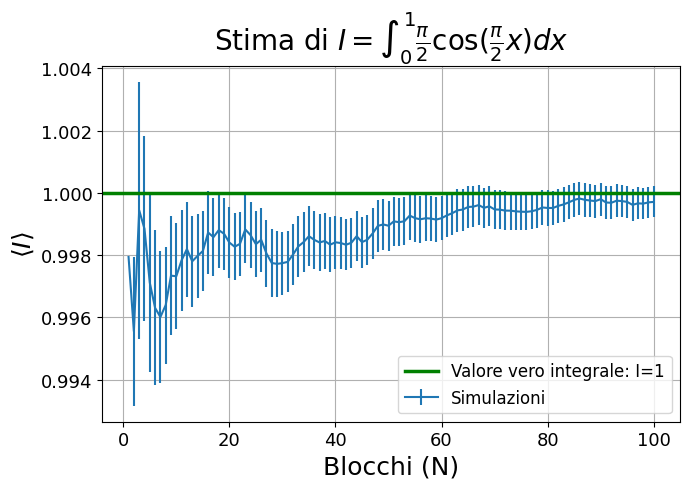

Valor medio integrale dai dati simulati:  0.9997 +\- 0.0005
Livello di confidenza con il valore atteso:  -0.58 sigma


In [5]:
N = len(ave_int)        # numero di numeri casuali
x = np.arange(1, N+1)   # x del grafico, numero di blocchi: [1,2,...,N]

plt.figure(figsize=(7, 5))
plt.title(r"Stima di $I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$",fontsize=20)

plt.errorbar(x, ave_int, yerr=err_int, label = "Simulazioni") #plotto la media cumulativa dell'integrale con errore

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle I \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1, xmin=0, xmax=1, label=r'Valore vero integrale: I=1', lw = 2.5, color = 'green')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

print("Valor medio integrale dai dati simulati: ", round(ave_int[-1],4), "+\-", round(err_int[-1],4))
print("Livello di confidenza con il valore atteso: ",round((ave_int[-1] - 1)/err_int[-1],2), "sigma")

Dai risultati ottenuti si evince che, dopo $10^6$ estrazioni, il calcolo dell'integrale con il metodo Monte Carlo ha avuto esito positivo, con un livello di confidenza di $0.6\sigma$.

### Punto 2 - Secondo metodo
Nel secondo metodo, l'estrazione delle variabili casuali avviene secondo una distribuzione diversa da quella uniforme e che approssima la funzione da integrare. $\\$

Per il calcolo della $p(x)$ da utilizzare si considera un'approssimazione lineare, e quindi la retta che parte da $(x=0,y=1)$ e arriva in $(x=\pi/2,y=0)$, ovvero i valori che assume la funzione agli estremi d'integrazione. Dopo averla normalizzata si ottiene la seguente pdf: $$p(x) = 2\cdot \left(1-x\right)$$

Si estraggono $10^{6}$ valori $x_{i}$ pseudocasuali che seguono questa distribuzione, utilizzando il metodo dell'inversa della cumulativa, che in questo caso dà $x= 1-\sqrt{1-y}$.

Ora l'approssimazione dell'integrale è $$I \simeq \dfrac{1}{N} \sum_{i=1}^{N} \dfrac{f(x_{i})}{p(x_{i})} $$ dove f è l'integranda. $\\$
Anche in questo caso viene riportato di seguito il risultato ottenuto della stima. Si generano $10^6$ numeri casuali e si calcola la media cumulativa al variare del numero dei $100$ blocchi in cui sono divisi.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# carico media cumulativa ed errore della stima dell'integrale con il secondo metodo
ave_int2, err_int2 = np.loadtxt("./Dati_es2-1-2.txt", unpack= True, usecols=(0,1), skiprows=1)

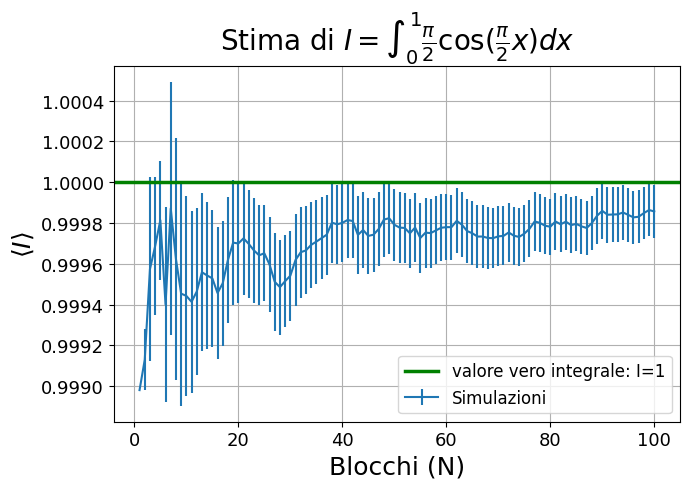

Valor medio integrale dai dati simulati:  0.99986 +\- 0.00013
Livello di confidenza con il valore atteso:  -1.12 sigma


In [14]:
N = len(ave_int)        # numero di numeri casuali
x = np.arange(1, N+1)   # x del grafico, numero di blocchi: [1,2,...,N]

plt.figure(figsize=(7, 5))
plt.title(r"Stima di $I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$",fontsize=20)

plt.errorbar(x, ave_int2, yerr = err_int2, label = "Simulazioni") #plotto la media cumulativa

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle I \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1, xmin=0, xmax=1, label=r'valore vero integrale: I=1', lw = 2.5, color = 'green')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

print("Valor medio integrale dai dati simulati: ", round(ave_int2[-1],5), "+\-", round(err_int2[-1],5))
print("Livello di confidenza con il valore atteso: ",round((ave_int2[-1] - 1)/err_int2[-1],2), "sigma")

Si nota che il livello di confidenza in questo caso è inferiore, questo è dovuto al fatto che l'errore è molto minore del primo metodo, quindi nel calcolo del CL influenza maggiormente. Per confrontare i due risultati in modo corretto vengono ora mostrati sullo stesso grafico.

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# carico media cumulativa ed errore della stima dell'integrale con il secondo metodo
ave_int, err_int = np.loadtxt("./Dati_es2-1-1.txt", unpack= True, usecols=(0,1), skiprows=1)
ave_int2, err_int2 = np.loadtxt("./Dati_es2-1-2.txt", unpack= True, usecols=(0,1), skiprows=1)

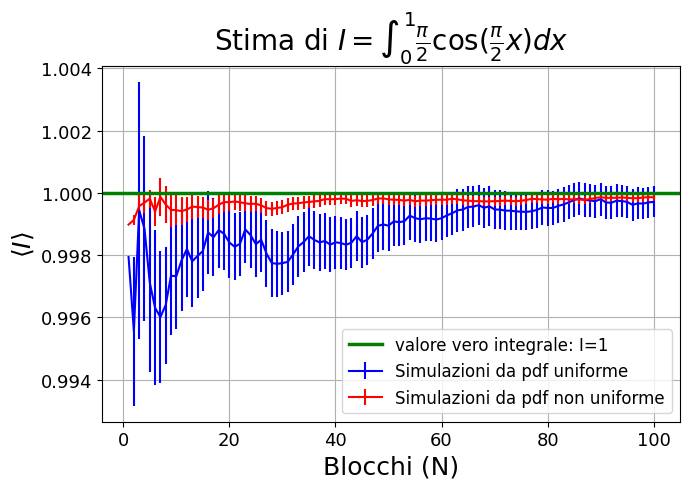

In [17]:
N = len(ave_int)        # numero di numeri casuali
x = np.arange(1, N+1)   # x del grafico, numero di blocchi: [1,2,...,N]

plt.figure(figsize=(7, 5))
plt.title(r"Stima di $I=\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2} x) dx$",fontsize=20)

plt.errorbar(x, ave_int, yerr = err_int, label = "Simulazioni da pdf uniforme", color = 'blue') #plotto la media cumulativa
plt.errorbar(x, ave_int2, yerr = err_int2, label = "Simulazioni da pdf non uniforme", color = 'red') #plotto la media cumulativa

plt.xlabel(r"Blocchi (N)", fontsize=18)
plt.ylabel(r"$\langle I \rangle$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1, xmin=0, xmax=1, label=r'valore vero integrale: I=1', lw = 2.5, color = 'green')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

Con questa visualizzazione è possibile notare che il secondo metodo converge più rapidamente al valore vero dell'integrale e che è soggetto a una deviazione standard inferiore.

## Esercizio 2.2 - Random Walks
In questo esercizio si vuole calcolare $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, la posizione finale di un Random Walk che parte dal centro e avanza nello spazio in modo casuale e a passi lunghi $a=1$. $\langle |\vec{r}_N|^2 \rangle_{RW}$ è la media della posizione finale (al quadrato) raggiunta dal Random Walk dopo $N$ passi. L'esercizio è diviso in due punti, nel primo si considerano Random Walk che avanzano elle tre direzioni spaziali discrete, mentre nel secondo punto avanzano in direzioni continue nello spazio. In entrambi i casi i Random Walk sono di $100$ passi e si svolgono $10^{6}$ simulazioni. In questo modo, dividendo le simulazioni per i $100$ passi, si ottengono $10^{4}$ Random Walk da $100$ passi.$\\$
Per ogni Random Walk si calcola la posizione finale raggiunta dopo $N=1,2,3,...,100$ passi, per poi dividere questi dati in $100$ blocchi, in modo che ogni blocco sia composto da $10^2$ Random Walk. Per ogni blocco si calcola la distanza al quadrato raggiunta al passo i-esimo, per poi estrarne una media e una deviazione standard tra i blocchi. $\\$
Il risultato ottenuto è un plot della radice di questa distanza quadratica media, al variare del numero di passi e con relativo errore (calcolato da propagazione degli errori). $\\$

### Punto 1 - Random Walks discreti
Nel primo puntole direzioni casuali sono discrete, e raprresentano un singolo passo di lunghezza $a=1$ nelle tre possibili direzioni spaziali, considerando tutti e 6 i versi possibili.

Il risultato viene fittato con una funzione del tipo $f(N) = k\cdot \sqrt{N}$ con $N$ il numero di passi, ovvero la funzione dell'andamento atteso.

In [1]:
# carico il file con le direzione 3D casuali, non posso più usare loadtxt di numpy
# perché ho generato delle stringhe

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # per il fit
import scipy.stats as stats # per il calcolo della cumulativa del chi quadro
import numpy as np

# carico i dati della distanza al variare dei passi con errore
r_n, err_rn = np.loadtxt("./Dati_es2-2-1.txt", unpack= True, usecols=(0,1), skiprows=1)

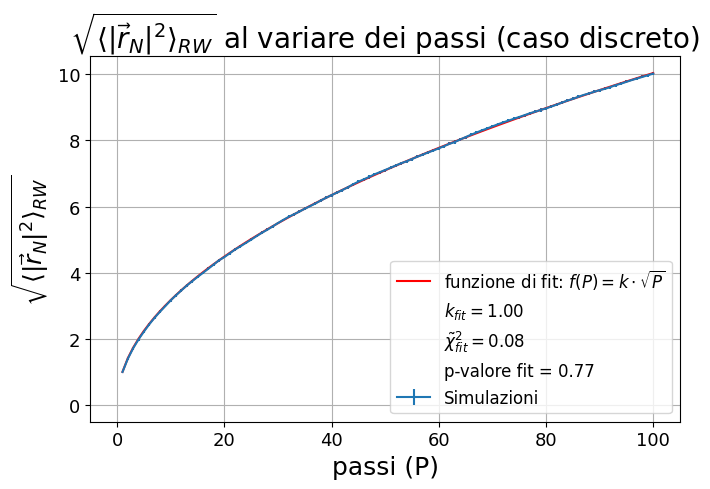

In [3]:
P = len(r_n)            # numero di passi totali
x = np.arange(1, P+1)   # x del grafico, numero di passi totali: [1,2,...,P]

plt.figure(figsize=(7, 5))
plt.title(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al variare dei passi (caso discreto)",fontsize=20)

plt.errorbar(x, r_n, yerr= err_rn, label = "Simulazioni")

# Funzione per il fit, k è il parametro da stimare
def fit_func(x, k):
    return k * np.sqrt(x)

# Fit dei dati
k,*useless = curve_fit(fit_func, x, r_n)

# Plot del fit
plt.plot(x, fit_func(x, *k), 'r-', label='funzione di fit: $f(P) = k\cdot \sqrt{P}$')
plt.plot(0,0,linewidth=1, label=r'$k_{fit} = %.2f $' %(k), color="white")

# Ora calcolo il chi quadro del fit, non considero il primo dato perché ha varianza nulla visto che è calcolato da un solo passo
y_fit = fit_func(x, *k)
residui = (r_n[1:] - y_fit[1:])/err_rn[1:]
chi_quadro = np.sum(residui**2)

GDL = len(k) # gradi di libertà ovvero 1

# calcolo il chi quadro ridotto dividendo il chi quadro per N-1
# (in cui N=99 perché ho tolto il primo dato e la sottrazione per 1 è perché ho un solo parametro libero k)

chi_ridotto = chi_quadro/(len(residui)-GDL)
plt.plot(0,0,linewidth=1, label=r'$\tilde{\chi}^{2}_{fit} = %.2f $' %(chi_ridotto), color="white")

p_val = 1 - stats.chi2.cdf(chi_ridotto*GDL, GDL)
plt.plot(0,0,linewidth=1, label=r'p-valore fit = %.2f' %(p_val), color="white")

plt.xlabel(r"passi (P)", fontsize=18)
plt.ylabel(r"$\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}}$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
plt.show()

### Punto 2 - Random Walks continui
Nel secondo punto si svolge la stessa analisi fatta in precedenza, ma questa volta considerando passi in ogni direzione spaziale. Genero ancora $10^{6}$ simulazioni divise in $100$ blocchi. Per ogni blocco ci sono dunque $10^4$ passi. $\\$

La direzione casuale presa ad ogni step è rappresentata in coordinate sferiche, dove in questo caso i dati casuali (distribuiti uniformemente) sono costituiti dalla coppia di valori $\theta \in [0, \pi]$ e $\phi \in [0, 2\pi]$, angoli delle coordinate sferiche. Si ricorda che $\phi$ è distribuito uniformemente, mentre per $\theta$ è necessario procedere tramite metodo dell'inversa della cumulativa, questo per ottenere una distribuzione di direzioni equiprobabile per ogni infinitesimo di angolo solido.$\\$

Anche in questo caso il risultato viene fittato con una funzione del tipo $f(N) = k\cdot \sqrt{N}$ con $N$ il numero di passi.

In [19]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # per il fit
import scipy.stats as stats # per il calcolo della cumulativa del chi quadro
import numpy as np

# carico i dati della distanza al variare dei passi con errore
r_n, err_rn = np.loadtxt("./Dati_es2-2-2.txt", unpack= True, usecols=(0,1), skiprows=1)

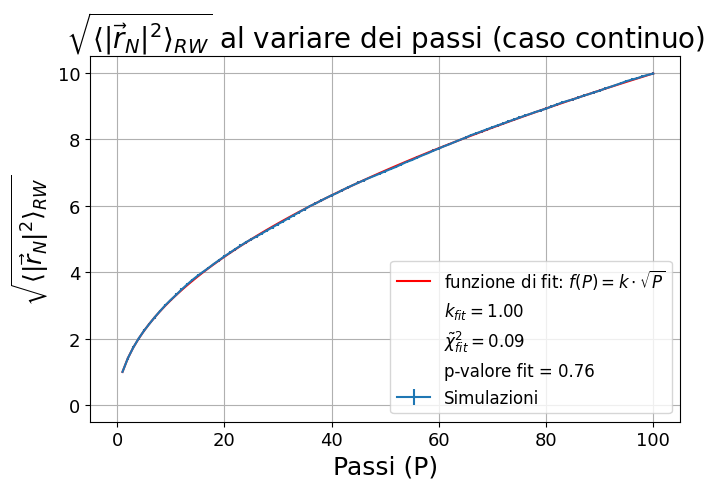

In [21]:
P = len(r_n)            # numero di passi totali
x = np.arange(1, P+1)   # x del grafico, numero di passi totali: [1,2,...,P]

plt.figure(figsize=(7, 5))
plt.title(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al variare dei passi (caso continuo)",fontsize=20)
plt.errorbar(x, r_n, yerr= err_rn, label = "Simulazioni")

# Funzione per il fit, k è il parametro da stimare
def fit_func(x, k):
    return k * np.sqrt(x)

# Fit dei dati
k,*useless = curve_fit(fit_func, x, r_n)

# Plot del fit
plt.plot(x, fit_func(x, *k), 'r-', label='funzione di fit: $f(P) = k\cdot \sqrt{P}$')
plt.plot(0,0,linewidth=1, label=r'$k_{fit} = %.2f $' %(k), color="white")

# Ora calcolo il chi quadro del fit, non considero il primo dato perché ha varianza nulla visto che è calcolato da un solo passo
y_fit = fit_func(x, *k)
residui = (r_n[1:] - y_fit[1:])/err_rn[1:]
chi_quadro = np.sum(residui**2)

GDL = len(k) # gradi di libertà ovvero 1

# calcolo il chi quadro ridotto dividendo il chi quadro per N-1
# (in cui N=99 perché ho tolto il primo dato e la sottrazione per 1 è perché ho un solo parametro libero k)

chi_ridotto = chi_quadro/(len(residui)-GDL)
plt.plot(0,0,linewidth=1, label=r'$\tilde{\chi}^{2}_{fit} = %.2f $' %(chi_ridotto), color="white")

p_val = 1 - stats.chi2.cdf(chi_ridotto*GDL, GDL)
plt.plot(0,0,linewidth=1, label=r'p-valore fit = %.2f' %(p_val), color="white")


plt.xlabel(r"Passi (P)", fontsize=18)
plt.ylabel(r"$\sqrt{\langle|\vec{r}_N|^2\rangle_{RW}}$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno
plt.show()

### Considerazioni sui risultati ottenuti
Si osserva qualitativamente dalla funzione di fit rossa e quantitativamente dai valori di $\tilde{\chi}^{2}$ ottenuti nei due casi che la distanza media raggiunta dopo $N$ passi segue effettivamente un andamento del tipo $\sim k\cdot \sqrt{N}$. Con un solo grado di libertà ($k$) ho ottenuto i seguenti valori di compatibilità nei due casi (direzioni discrete e continue, rispettivamente): $\\$

$\tilde{\chi}^{2}_{1} = 0.08 \Rightarrow $ compatibile al $77\%$ con $k=1.0$ $\\$
$\tilde{\chi}^{2}_{2} = 0.09 \Rightarrow $ compatibile al $76\%$ con $k=1.0$

I risultati ottenuti confermano l'andamento aspettato per entrambi i random walk.